Exploratory Data Analysis of New York schools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.plotly as py

In [5]:
pd.set_option('display.max_columns', None)  
df = pd.read_csv('/Users/sonalijohari/Downloads/data-science-for-good/2016 School Explorer.csv')
shsat = pd.read_csv('/Users/sonalijohari/Downloads/data-science-for-good/D5 SHSAT Registrations and Testers.csv')
safety = pd.read_csv('/Users/sonalijohari/Downloads/ny-2010-2016-school-safety-report/2010-2016-school-safety-report.csv')

In [6]:
df.head(5)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [7]:
df.shape

(1272, 161)

In [10]:
df.isnull().sum()

Adjusted Grade                                        1270
New?                                                  1245
Other Location Code in LCGMS                          1271
School Name                                              0
SED Code                                                 0
Location Code                                            0
District                                                 0
Latitude                                                 0
Longitude                                                0
Address (Full)                                           0
City                                                     0
Zip                                                      0
Grades                                                   0
Grade Low                                                0
Grade High                                               0
Community School?                                        0
Economic Need Index                                     

dropping columns 1 and 3 since they contain almost no data

In [58]:
df.drop(columns = ['Adjusted Grade', 'Other Location Code in LCGMS', 'New?'] )

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific

In [13]:
# Preprocess some data
# Create a function to convert the percentage to a fraction 
def p2f(x):
    return float(x.strip('%'))/100

In [14]:
df['Percent of Students Chronically Absent']=df['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].astype(str).apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].astype(str).apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].astype(str).apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].astype(str).apply(p2f)
df['Trust %'] = df['Trust %'].astype(str).apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].astype(str).apply(p2f)

In [22]:
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ', '')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)

In [23]:
df['School Income Estimate'] = df['School Income Estimate'].fillna(0)
df['Economic Need Index'] = df['Economic Need Index'].fillna(0)

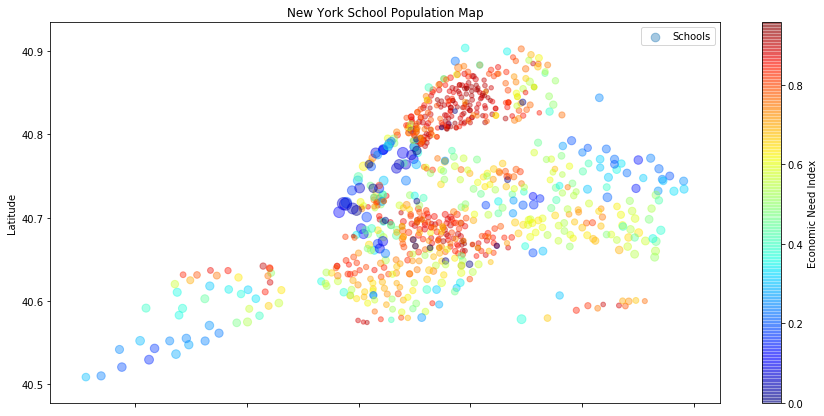

In [24]:
# Static Version
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['School Income Estimate']/1210, c="Economic Need Index", cmap=plt.get_cmap("jet"),
        label='Schools', title='New York School Population Map',colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()

In [25]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York School Population (Economic Need Index)',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    ))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

New York Map of Black/Hispanic Percentage of Schools

In [26]:
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)

Central New York contains most of the Schools with Blacks¶
Majority of the black population are living in Central New York. If you compare this to the Hispanic Population, they are totally isolated from each other.

In [27]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Black"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Black Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

Upper New York contains most of the Schools with Hispanics
Majority of the hispanic population are living in Upper New York. Again, notice how there are a few Hispanics in Central New York while there are a majority of Blacks in Central New York.

In [28]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Hispanic"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Hispanic Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

New York Map of Asian/White Percentage of Schools
The Asian population are mostly living in Central New York.

The White Population has a very noticeable cluster near the edge and lower parts of New York

In [30]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Asian"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Hispanic Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [31]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent White"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Hispanic Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

Race Percentage Distribution from Schools
Interesting Find:

Majority of Whites and Asians are representing 10% of the school's population
Blacks and Hispanics represent majority of the school's population

Text(0, 0.5, 'Employee Count')

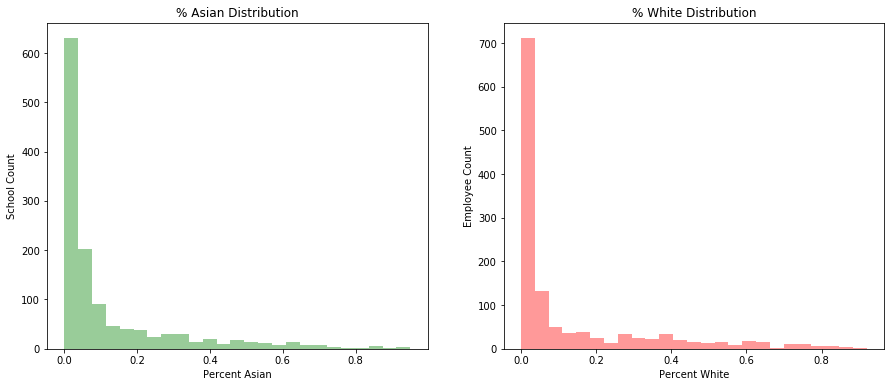

In [32]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['Percent Asian'], kde=False, color="g", ax=axes[0], bins=25).set_title('% Asian Distribution')
axes[0].set_ylabel('School Count')

# Graph Employee Evaluation
sns.distplot(df['Percent White'], kde=False, color="r", ax=axes[1], bins=25).set_title('% White Distribution')
axes[1].set_ylabel('Employee Count')

Text(0, 0.5, 'Employee Count')

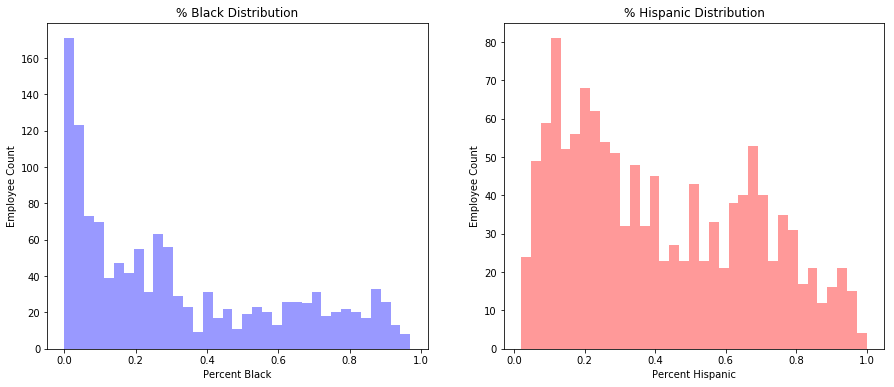

In [33]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Average Monthly Hours
sns.distplot(df['Percent Black'], kde=False, color="b", ax=axes[0], bins=35).set_title('% Black Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df['Percent Hispanic'], kde=False, color="r", ax=axes[1], bins=35).set_title('% Hispanic Distribution')
axes[1].set_ylabel('Employee Count')

Correlation Matrix
Using our numeric features, let's take a look at our correlation matrix. Here are some interesting correlations:

Economic Need Index
Schools with more White Students have a lower economic need index, meaning the schools are operating just fine without the need of help.
Schools with more Asian Students have a slightly lower economic need index.
Schools with more Black/Hispanic Students have a higher economic need index, meaning the schools are in need of help.
Schools with more Chronically Absent Students have a higher economic need index
School Income Estimate
Schools with more White/Asian Students have a higher school income estimate.
Schools with more Black/Hispanic Students have a lower school income estimate

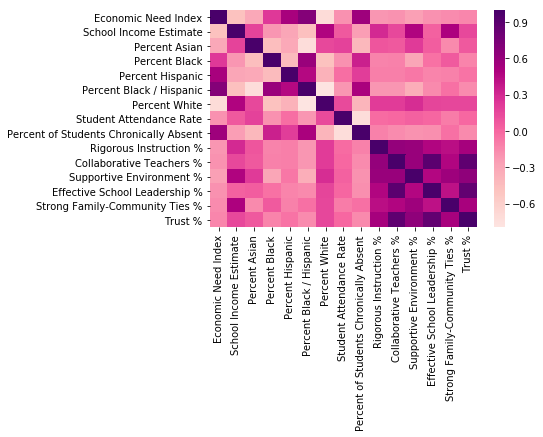

In [36]:
df2 = df.iloc[:,[16,17,19,20,21,22,23,24,25,26,28,30,32,34,36]]
#Correlation Matrix
corr = df2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdPu", center=0)

Student Race & Economic Need Index
This is a really interesting find:

Schools with a Higher White and Asian Population tend to have a Lower Economic Need Index Score.
Schools with a Higher Hispanic and Black Population tend to have a Higher Economic Need Index Score.
Our main focus should be to try and understand what is making the Hispanic and Black Students in need of help.

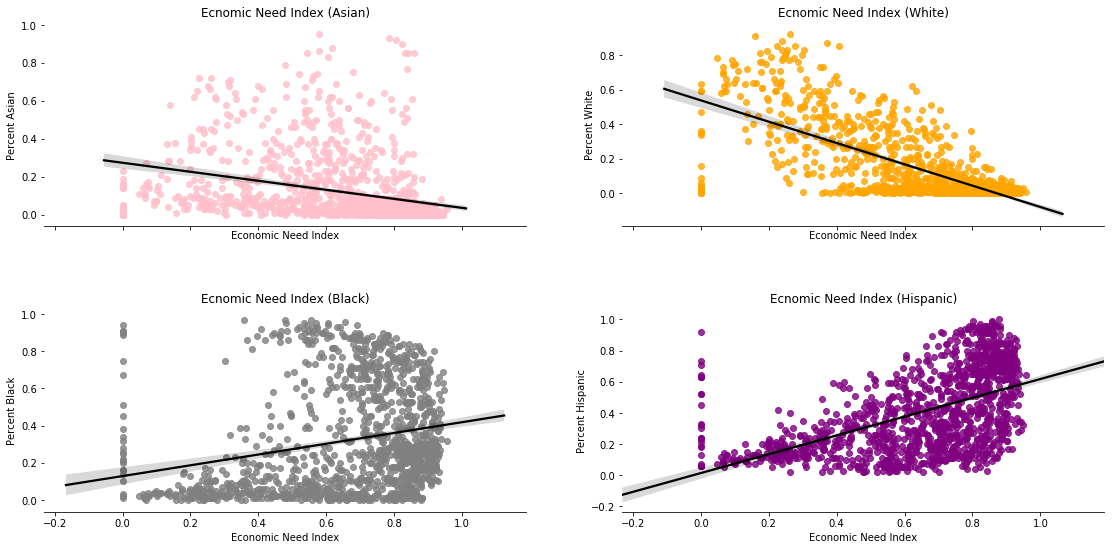

In [53]:
f, axes = plt.subplots(2, 2, figsize=(19, 9), sharex=True)
sns.despine(left=True)

sns.regplot(x=df["Economic Need Index"], y=df["Percent Asian"], color='pink', ax=axes[0, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent White"], color='orange', ax=axes[0, 1], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Black"], color='gray', ax=axes[1, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Hispanic"], color='purple', ax=axes[1, 1], line_kws={"color": "black"})

axes[0,0].set_title('Ecnomic Need Index (Asian)')
axes[0,1].set_title('Ecnomic Need Index (White)')
axes[1,0].set_title('Ecnomic Need Index (Black)')
axes[1,1].set_title('Ecnomic Need Index (Hispanic)')

plt.subplots_adjust(hspace=0.4)

Schools and Student Attendance
Question
Is there a difference between the students in schools with higher-to-lower attendance rate?

Our goal is to find good proxies for underdeveloped schools. Let's see if there are any differences between the attendance rate.

Idea
With these two groups, we can perform some hypothesis testing to see if there really are any statistical significance of different metrics (ex. Income, Economic Index Need, and Race) between Schools with 30% Absent Rate and 10% Absent Rate.

Interesting Find
As you can see, the average absent rate for students is about 20%.

Let's dive in deep to understand if there are any real differences between schools with an absent rate of <= 11% and an absent rate of >= 30%.

In [38]:
# Create a dataframe of schools with an absent rate of 30% or more.
absent_30 = df[df['Percent of Students Chronically Absent']>=.30]

# Create a dataframe of schools with an absent rate of 11% or less.
absent_11 = df[df['Percent of Students Chronically Absent']<=.11]

# Exploring School Absent Rate 
df['Percent of Students Chronically Absent'].describe()

count    1247.000000
mean        0.215750
std         0.140716
min         0.000000
25%         0.110000
50%         0.200000
75%         0.300000
max         1.000000
Name: Percent of Students Chronically Absent, dtype: float64

Schools with 30% Absent Ratio:
Average Economic Need Index at 84%
Average School Income at $33,000
Asians and Whites make up about 5% of the students in these schools.
Blacks and Hispanics make up about 95% of the students in these schools.
Schools with 10% Absent Ratio:
Average Economic Need Index at 48%
Average School Income at $64,000
Asians and Whites make up about 52% of the students in these schools.
Blacks and Hispanics make up about 48% of the students in these schools.

Schools with 30% Absent Rate

In [39]:
absent_30.iloc[:,[15,16,17,23,19,20,21,22]].describe()

,Economic Need Index,School Income Estimate,Percent White,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.840624,24213.924788,0.025455,0.027212,0.455091,0.477121,0.932121
std,0.080521,17646.702137,0.040520,0.039312,0.225843,0.228938,0.066482
min,0.369000,0.000000,0.000000,0.000000,0.010000,0.020000,0.480000
25%,0.807500,0.000000,0.010000,0.010000,0.260000,0.270000,0.920000
50%,0.857500,27338.415000,0.020000,0.010000,0.440000,0.485000,0.950000
75%,0.898750,35521.105000,0.030000,0.030000,0.660000,0.680000,0.970000
max,0.957000,79244.110000,0.460000,0.320000,0.950000,0.920000,0.990000


Schools with 10% Absent Rate

In [41]:
absent_11.iloc[:,[3,15,16,17,23,19,20,21,22]].describe()

,Economic Need Index,School Income Estimate,Percent White,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,0.484862,44751.846319,0.254632,0.238436,0.187239,0.293374,0.480644
std,0.226285,36657.241653,0.249776,0.246289,0.272421,0.245842,0.325940
min,0.049000,0.000000,0.000000,0.000000,0.000000,0.020000,0.030000
25%,0.295250,0.000000,0.020000,0.040000,0.020000,0.120000,0.200000
50%,0.488500,46699.660000,0.180000,0.140000,0.060000,0.200000,0.370000
75%,0.682000,69124.027500,0.437500,0.397500,0.220000,0.397500,0.870000
max,0.878000,181382.060000,0.910000,0.950000,0.970000,1.000000,1.000000


Location of High and Low Absent Rate Schools

Shools with 30% Absent Rate
The schools with 30% absent rate are more clumped in the Central and Upper regions of New York.

In [42]:
data = [
    {
        'x': absent_30["Longitude"],
        'y': absent_30["Latitude"],
        'text': absent_30["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Schools with 30% Absent Rate',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

Scools with 10% Absent Rate
The scools with 10% absent rate are more dispersed around the New York area.

In [43]:
data = [
    {
        'x': absent_11["Longitude"],
        'y': absent_11["Latitude"],
        'text': absent_11["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Schools with 10% Absent Rate',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [66]:
data = [
    {
        'x': df["Economic Need Index"],
        'y': df["School Income Estimate"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Economic need vs School income',
    xaxis= dict(
        title= 'Economic Need'
    ),
    yaxis=dict(
        title='School Income'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [57]:
df_new = df.nlargest(10, ["Economic Need Index"]) 
df_new[['School Name', 'Economic Need Index']]

,School Name,Economic Need Index
202,P.S. 065 MOTHER HALE ACADEMY,0.957
752,P.S. 150 CHRISTOPHER,0.948
764,CHRISTOPHER AVENUE COMMUNITY SCHOOL,0.944
642,BROOKLYN GARDENS ELEMENTARY SCHOOL,0.943
264,P.S. 055 BENJAMIN FRANKLIN,0.939
298,NEW MILLENNIUM BUSINESS ACADEMY MIDDLE SCHOOL,0.938
456,P.S. 067 CHARLES A. DORSEY,0.938
262,P.S. 042 CLAREMONT,0.935
289,THE NEW AMERICAN ACADEMY AT ROBERTO CLEMENTE S...,0.934
326,P.S. 059 THE COMMUNITY SCHOOL OF TECHNOLOGY,0.934


In [69]:
data = [
    {
        'x': df["Economic Need Index"],
        'y': df["Percent of Students Chronically Absent"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Economic need vs Chronic Absenteeism',
    xaxis= dict(
        title= 'Economic Need'
    ),
    yaxis=dict(
        title='% of students chronically absent'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

Now let us look at the SHSAT registrations 

In [70]:
shsat.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14


In [71]:
shsat['Took Percentage'] = shsat['Number of students who took the SHSAT'] / shsat['Number of students who registered for the SHSAT']

In [72]:
shsat_sorted = shsat.groupby(['DBN','School name'], as_index=False).sum()
shsat_sorted.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Took Percentage
0,05M046,P.S. 046 Arthur Tappan,8058,32,315,98,39,1.597034
1,05M123,P.S. 123 Mahalia Jackson,8058,32,241,84,37,1.700780
2,05M129,P.S. 129 John H. Finley,8058,32,252,108,48,2.396452
3,05M148,Eagle Academy for Young Men of Harlem,6047,25,222,12,11,1.857143
4,05M157,The Urban Assembly School for Global Commerce,8058,36,309,7,3,1.333333


In [73]:
shsat_sorted = shsat.groupby(['DBN','School name'], as_index=False).sum()
shsat_sorted= shsat_sorted[['DBN','School name', 
                                 'Enrollment on 10/31', 
                                 'Number of students who registered for the SHSAT', 
                                 'Number of students who took the SHSAT']].join(shsat[['Year of SHST', 
                                                                                          'Grade level']], how='inner')
shsat_sorted = shsat_sorted.sort_values('Number of students who registered for the SHSAT',ascending=False)

In [74]:
shsat_sorted['Took Percentage'] = shsat_sorted['Number of students who took the SHSAT'] / shsat_sorted['Number of students who registered for the SHSAT']

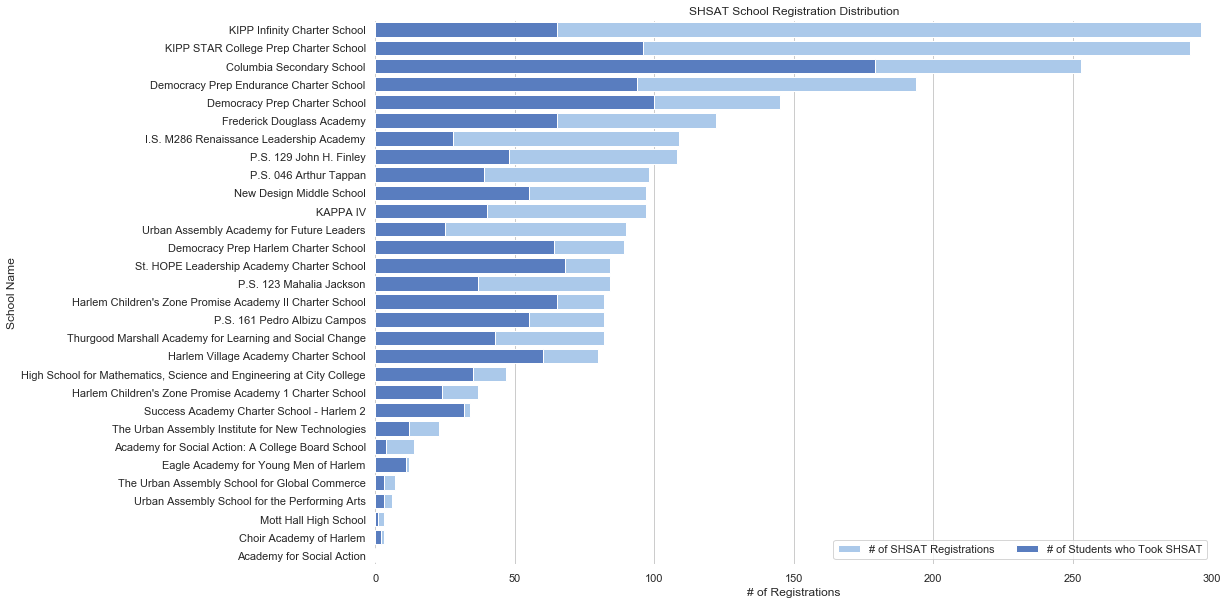

In [75]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="Number of students who registered for the SHSAT", y='School name', data=shsat_sorted,
            label="# of SHSAT Registrations", color="b", ci=None)

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="Number of students who took the SHSAT", y="School name", data=shsat_sorted,
            label="# of Students who Took SHSAT", color="b",ci=None)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 300), ylabel="School Name", title='SHSAT School Registration Distribution',
       xlabel="# of Registrations")
sns.despine(left=True, bottom=True)